# STATISTICS

In [1]:

import os
import glob
import pandas as pd
import numpy as np
import math
#import pyentrp


#import antropy as ant
#import pyentrp

#from pyentrp import entropy as ent

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET

curfolder = os.getcwd()
print(curfolder)


features = curfolder + '/feature_extraction_with2d.csv'
features = pd.read_csv(features)



/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning


# Normalize all the feature data

In [10]:
from sklearn.preprocessing import StandardScaler
normed_features = features.copy()
normed_features = normed_features.replace([np.inf, -np.inf], 0)
normed_features
normed_features[normed_features.columns[32:]] = StandardScaler().fit_transform(normed_features[normed_features.columns[32:]])

In [11]:
normed_features.columns[32:]

Index(['left_index_space2D', 'left_wrist_space2D', 'left_elbow_space2D',
       'total_left_arm_space2D', 'right_index_space2D', 'right_wrist_space2D',
       'right_elbow_space2D', 'total_right_arm_space2D', 'left_ankle_space2D',
       'left_knee_space2D', 'left_hip_space2D', 'total_left_leg_space2D',
       'right_ankle_space2D', 'right_knee_space2D', 'right_hip_space2D',
       'total_right_leg_space2D', 'nose_space2D', 'total_head_space2D',
       'total_gesture_space2D', 'right_wrist_entropy2D',
       'left_wrist_entropy2D', 'right_knee_entropy2D', 'left_knee_entropy2D',
       'right_ankle_entropy2D', 'left_ankle_entropy2D', 'total_body_entropy2D',
       'right_wrist_variability2D', 'left_wrist_variability2D',
       'total_body_variability2D'],
      dtype='object')

# SeaBorn Plots

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

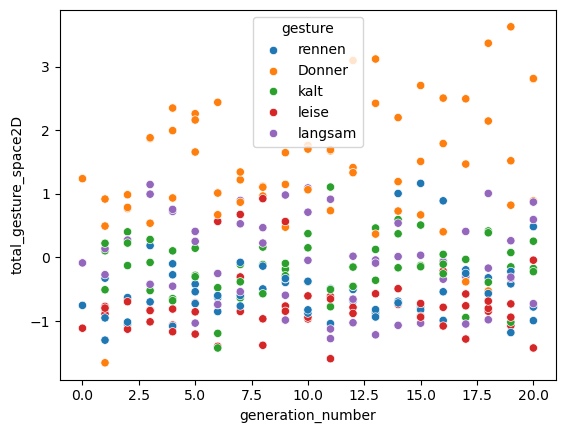

In [12]:
import seaborn as sns
import seaborn.objects as so
sns.scatterplot(data=normed_features, x="generation_number", y="total_gesture_space2D", hue="gesture")

# UMAP

In [13]:
import umap
reducer = umap.UMAP()

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# THIS IS JUST TO ADDRESS THE KALT G0 ISSUE. IT MUST GO LATER ON
normed_features[normed_features.columns[32:]] = normed_features[normed_features.columns[32:]].fillna(0)
embedding = reducer.fit_transform(normed_features[normed_features.columns[32:]])
embedding.shape

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(303, 2)

In [17]:
embeddings = pd.DataFrame(embedding)
features["X_embeddings"] = embeddings.iloc[:, 0]
features["Y_embeddings"] = embeddings.iloc[:, 1]
normed_features["X_embeddings"] = embeddings.iloc[:, 0]
normed_features["Y_embeddings"] = embeddings.iloc[:, 1]

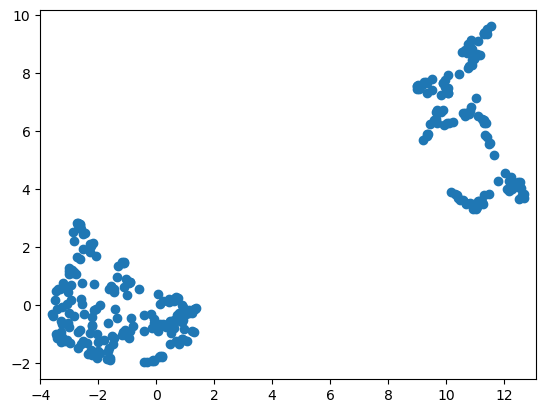

In [18]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
plt.gca().set_aspect('equal', 'datalim'))

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

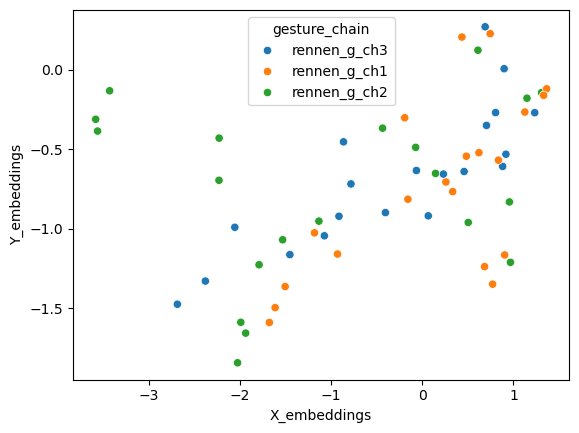

In [19]:
# graph a specific gesture and its differen't chains
specific = features[normed_features['gesture'] == 'rennen']
sns.scatterplot(data=specific, x="X_embeddings", y="Y_embeddings", hue="gesture_chain")

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

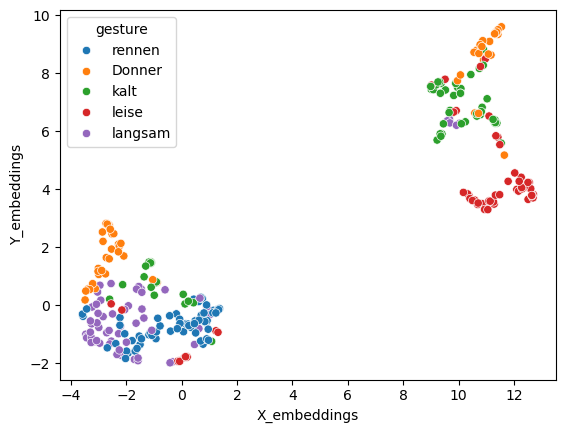

In [20]:
sns.scatterplot(data=features, x="X_embeddings", y="Y_embeddings", hue="gesture")

# Euclidean Distances

Comparing Two Vectors

In [21]:
# make sure to put normalized vectors into this function. 
def calculate_distances(feature_vector1, feature_vector2):
    squared_diff =np.square(feature_vector1-feature_vector2)
    sum_squared_diff = np.sum(squared_diff)
    eucl_distance = math.sqrt(sum_squared_diff)
    return eucl_distance

# feed in the dataframe that contains just the vector of features.
def calculate_distances_to_all(target_segment_index, array):
    target_segment = array[target_segment_index]
    distances = np.empty(array.shape[0])
    i = 0
    for row in array:
        distances[i] = calculate_distances(target_segment, row)
        i = i+1
    return distances


Comparing all vectors to each other and saving in a dataframe

In [23]:
interseg_dist = np.empty(normed_features[normed_features.columns[32:60]].shape)
interseg_dist = pd.DataFrame(interseg_dist)
interseg_dist = pd.DataFrame()
#make individual id for each segment
df_of_vectors = normed_features[normed_features.columns[32:60]].copy()
df_of_vectors = df_of_vectors.to_numpy()

# calculate distance between each segment
for i in range (normed_features[normed_features.columns[32:60]].shape[0]):
    id = normed_features.loc[i, 'fileID']
    interseg_dist_vector = calculate_distances_to_all(i, df_of_vectors)
    #interseg_dist_vector = interseg_dist_vector.reshape(1, -1)
    interseg_dist = interseg_dist.rename(index={i: id})
    interseg_dist = interseg_dist.rename(columns={i: id})
    interseg_dist[id] = interseg_dist_vector

globals()["interseg_dist"] = interseg_dist
globals()["interseg_dist"].to_csv(os.path.join(curfolder, f'{"interseg_dist"}.csv'), index=False)